In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data_loader # Import your data loader script
#f
# --- Load the Data using the function ---
df = data_loader.load_heart_data()

# --- Basic Inspection (Only if data loaded) ---
if df is not None:
    data_loaded = True
    print("\n--- First 5 Rows: ---")
    print(df.head())

    print("\n--- Data Info (Types, Non-Null Counts): ---")
    df.info() # Check data types and initial missing value counts

    print("\n--- Data Shape (Rows, Columns): ---")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

    print("\n--- Missing Values Count ('?'): ---")
    print(df.isnull().sum()) # Count how many 'NaN' values per column
else:
    data_loaded = False
    print("Failed to load data. Cannot proceed with exploration.")

# Set plotting style
sns.set_style('darkgrid')

--- Data loaded successfully from ./data_base/processed.cleveland.data ---

--- First 5 Rows: ---
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

--- Data Info (Types, Non-Null Counts): ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    

--- Original Target Variable Distribution ---
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

--- Converting to Binary Target (0: No Disease, 1: Disease Present) ---

--- Binary Target Variable Distribution ---
target_binary
0    164
1    139
Name: count, dtype: int64

--- Visualizing Binary Target Distribution ---


C:\Users\samia\AppData\Local\Temp\ipykernel_25452\661329728.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_binary', data=df, palette='viridis') # Create the bar plot


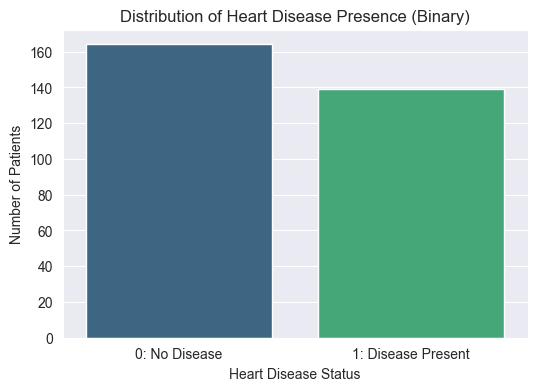


Percentage without disease (0): 54.13%
Percentage with disease (1):    45.87%
The dataset looks reasonably balanced.


In [12]:
# Make sure df is loaded and data_loaded is True from the previous cell
if 'data_loaded' in locals() and data_loaded:
    print("--- Original Target Variable Distribution ---")
    # Display counts for each original target value (0, 1, 2, 3, 4)
    print(df['target'].value_counts().sort_index()) # .sort_index() to show in order

    print("\n--- Converting to Binary Target (0: No Disease, 1: Disease Present) ---")
    # Create a new column 'target_binary'
    # If original target is 0, it remains 0. If it's 1, 2, 3, or 4, it becomes 1.
    df['target_binary'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

    print("\n--- Binary Target Variable Distribution ---")
    # Display counts for the new binary target values (0 and 1)
    target_counts = df['target_binary'].value_counts()
    print(target_counts)

    # --- Visualize the binary target distribution ---
    print("\n--- Visualizing Binary Target Distribution ---")
    try:
        plt.figure(figsize=(6, 4)) # Set the figure size
        sns.countplot(x='target_binary', data=df, palette='viridis') # Create the bar plot
        plt.title('Distribution of Heart Disease Presence (Binary)')
        plt.xlabel('Heart Disease Status')
        plt.ylabel('Number of Patients')
        # Add more descriptive labels to the x-axis ticks
        plt.xticks(ticks=[0, 1], labels=['0: No Disease', '1: Disease Present'])
        plt.show() # Display the plot

        # --- Check balance percentage ---
        if len(df) > 0:
            print(f"\nPercentage without disease (0): {target_counts.get(0, 0) / len(df) * 100:.2f}%")
            print(f"Percentage with disease (1):    {target_counts.get(1, 0) / len(df) * 100:.2f}%")
            if abs(target_counts.get(0, 0) - target_counts.get(1, 0)) / len(df) < 0.1: # Example threshold for "balanced"
                 print("The dataset looks reasonably balanced.")
            else:
                 print("The dataset has some imbalance.")

    except Exception as e:
        print(f"An error occurred during plotting: {e}")

else:
    print("Data not loaded in the previous step. Cannot perform target analysis.")

--- Analyzing Numerical Features ---

--- Descriptive Statistics for Numerical Features ---
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.438944   9.038662   29.0   48.0   56.0   61.0   77.0
trestbps  303.0  131.689769  17.599748   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.693069  51.776918  126.0  211.0  241.0  275.0  564.0
thalach   303.0  149.607261  22.875003   71.0  133.5  153.0  166.0  202.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

--- Histograms for Numerical Features (Distribution) ---


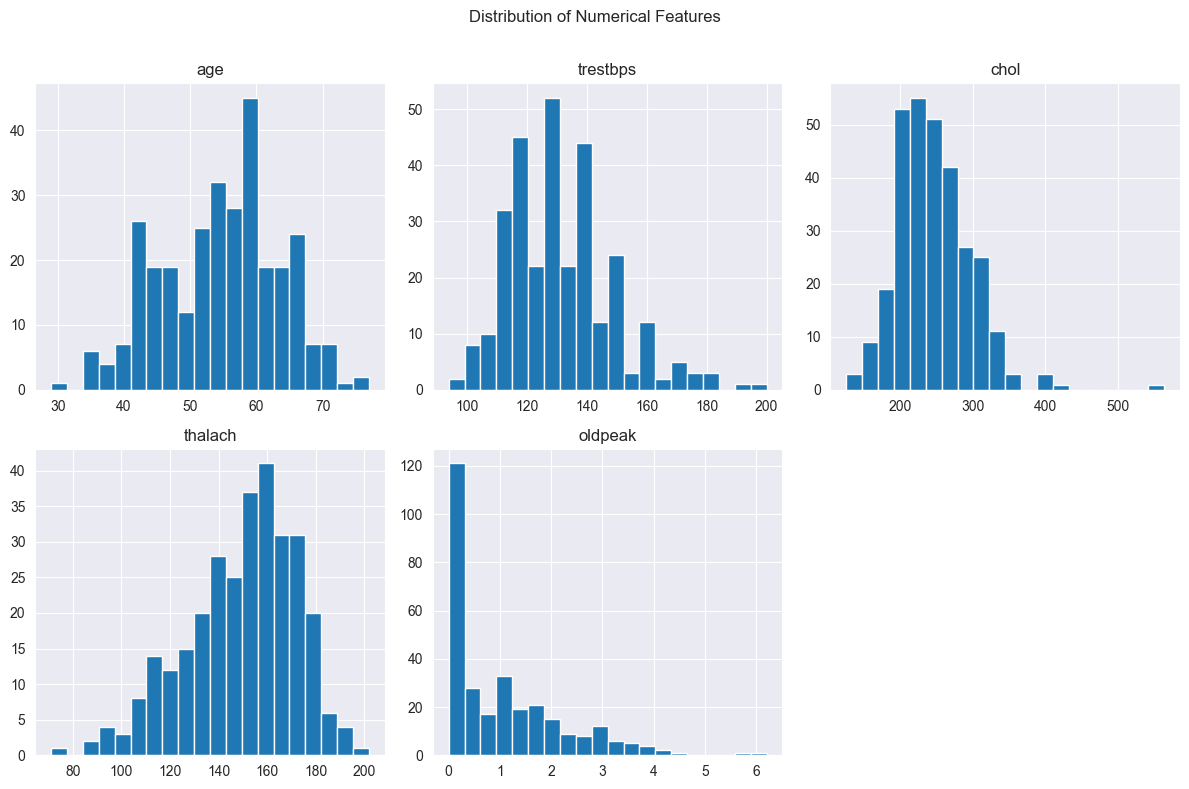


--- Box Plots for Numerical Features (Outliers/Spread) ---


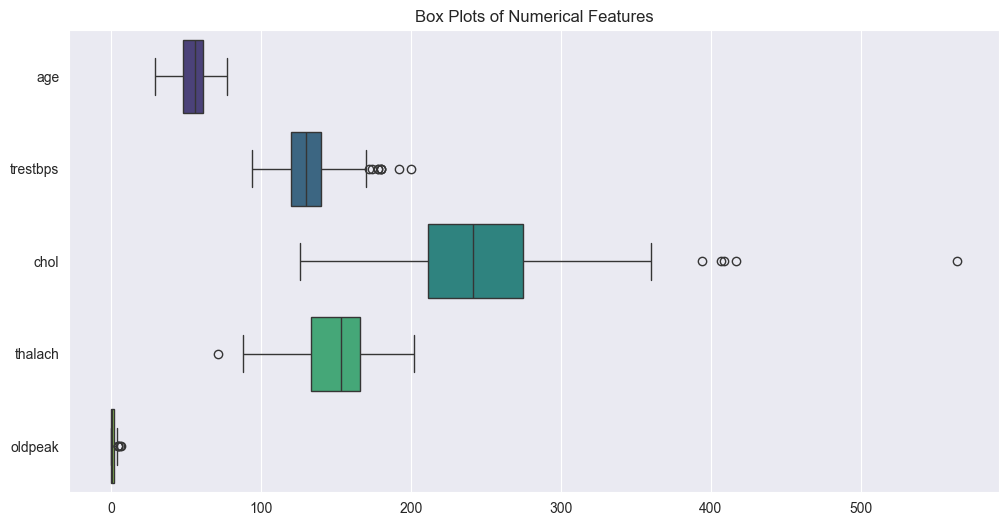

In [13]:
# Make sure df exists and data_loaded is True
if 'data_loaded' in locals() and data_loaded:
    print("--- Analyzing Numerical Features ---")

    # List of numerical columns to analyze
    # Note: We exclude 'target' as it's the original multi-class target
    # We will analyze 'target_binary' separately or in relation to features
    numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    # --- 1. Descriptive Statistics ---
    print("\n--- Descriptive Statistics for Numerical Features ---")
    # .T transposes the table for potentially better readability
    print(df[numerical_cols].describe().T)

    # --- 2. Histograms (Distribution) ---
    print("\n--- Histograms for Numerical Features (Distribution) ---")
    df[numerical_cols].hist(figsize=(12, 8), bins=20, layout=(2, 3))
    plt.suptitle('Distribution of Numerical Features') # Add an overall title
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to prevent title overlap
    plt.show()

    # --- 3. Box Plots (Outliers/Spread) ---
    print("\n--- Box Plots for Numerical Features (Outliers/Spread) ---")
    plt.figure(figsize=(12, 6)) # Adjust figure size if needed
    sns.boxplot(data=df[numerical_cols], orient='h', palette='viridis') # Horizontal box plots
    plt.title('Box Plots of Numerical Features')
    plt.show()

else:
    print("Data not loaded. Cannot analyze numerical features.")

--- Analyzing Categorical Features ---

--- Feature: sex ---
Value Counts for sex:
sex
0.0     97
1.0    206
Name: count, dtype: int64


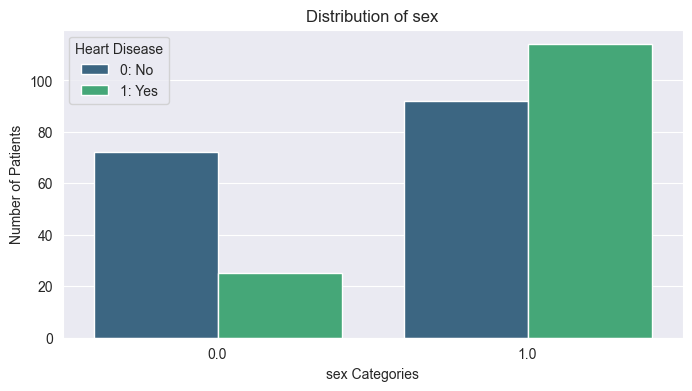


--- Feature: cp ---
Value Counts for cp:
cp
1.0     23
2.0     50
3.0     86
4.0    144
Name: count, dtype: int64


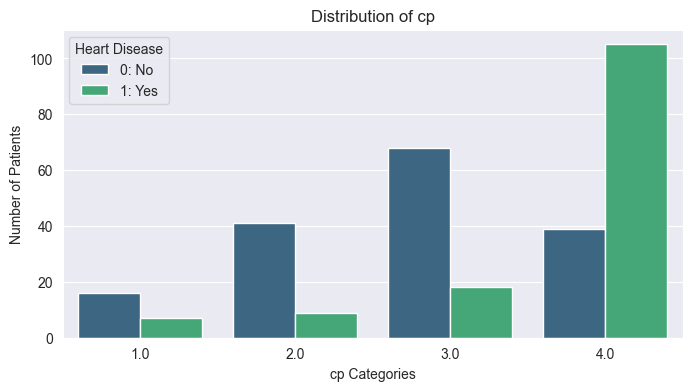


--- Feature: fbs ---
Value Counts for fbs:
fbs
0.0    258
1.0     45
Name: count, dtype: int64


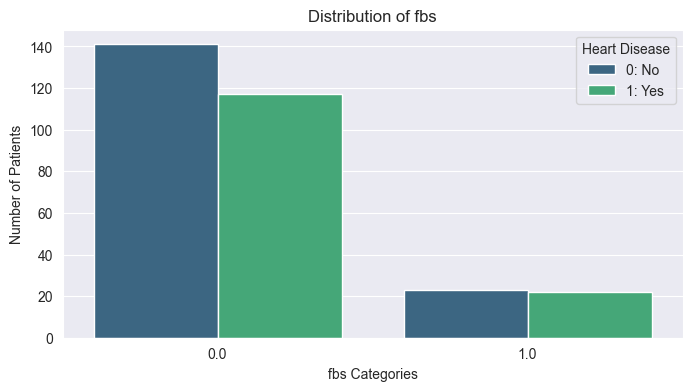


--- Feature: restecg ---
Value Counts for restecg:
restecg
0.0    151
1.0      4
2.0    148
Name: count, dtype: int64


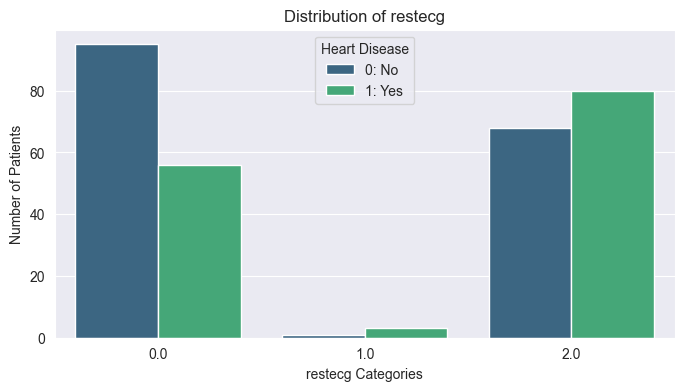


--- Feature: exang ---
Value Counts for exang:
exang
0.0    204
1.0     99
Name: count, dtype: int64


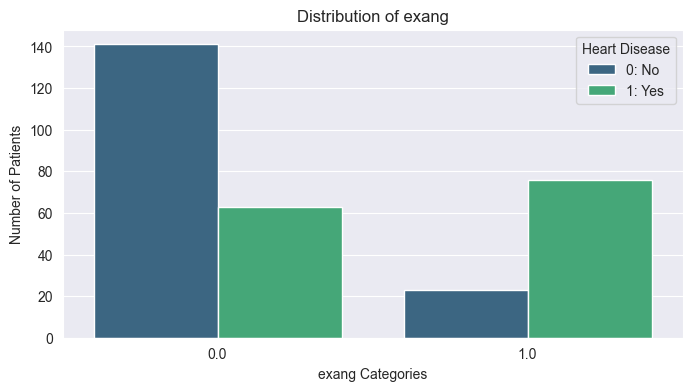


--- Feature: slope ---
Value Counts for slope:
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64


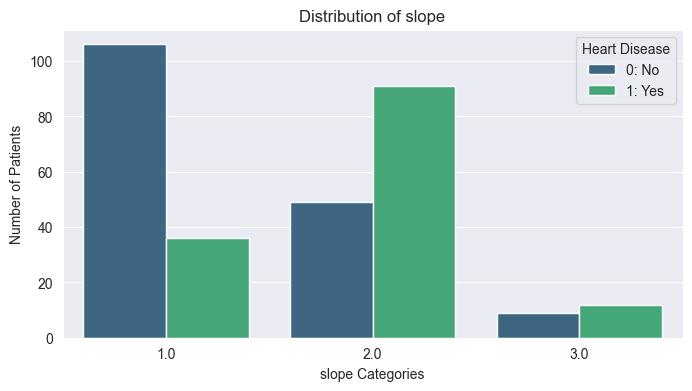


--- Feature: ca ---
Value Counts for ca:
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


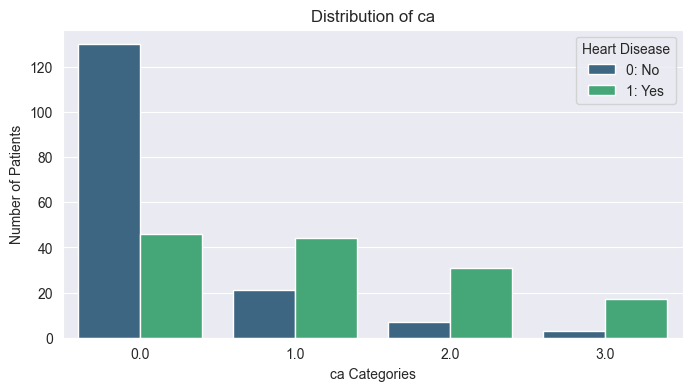


--- Feature: thal ---
Value Counts for thal:
thal
3.0    166
6.0     18
7.0    117
Name: count, dtype: int64


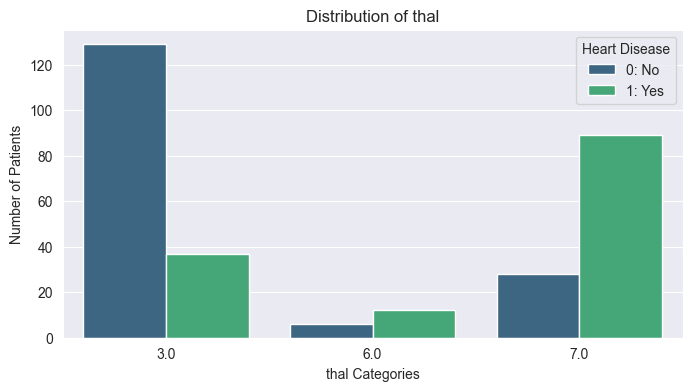

In [14]:
# Make sure df exists and data_loaded is True
if 'data_loaded' in locals() and data_loaded:
    print("--- Analyzing Categorical Features ---")

    # List of categorical columns to analyze
    # Note: 'ca' and 'thal' might show floats due to NaNs, but represent categories.
    # We are including them here to see their distributions.
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

    # --- Value Counts and Bar Plots for each categorical feature ---
    for col in categorical_cols:
        print(f"\n--- Feature: {col} ---")

        # Print the counts of each category
        print(f"Value Counts for {col}:")
        # value_counts(dropna=False) would show NaN counts if needed, but default (True) is fine for now
        print(df[col].value_counts().sort_index())

        # Create a count plot (bar chart)
        try:
            plt.figure(figsize=(8, 4)) # Adjust size as needed
            # Use hue based on target_binary to see relationship with heart disease
            # Check if target_binary exists before using hue
            hue_col = 'target_binary' if 'target_binary' in df.columns else None
            sns.countplot(x=col, data=df, palette='viridis', order=sorted(df[col].dropna().unique()), hue=hue_col)
            plt.title(f'Distribution of {col}')
            plt.xlabel(f'{col} Categories')
            plt.ylabel('Number of Patients')
            if hue_col:
                plt.legend(title='Heart Disease', labels=['0: No', '1: Yes'])
            plt.show()
        except Exception as e:
            print(f"Could not plot {col}. Error: {e}")

else:
    print("Data not loaded. Cannot analyze categorical features.")